# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

In [65]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget
# ____
#!pip install wordcloud
#!pip install fileupload
#!pip install ipywidgets
#!jupyter nbextension install --py --user fileupload
#!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [69]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `test.txt` (76.28 kB)


In [75]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE, DO YOUR OWN BEST ALGORITHMS
    
    #Lower file content, then make the list of sentences
    file_contents = file_contents.split("\n")
    word_dict = {}
    #solve 
    for sentence in file_contents:
    # split sentence into each word in temp_sen by space
        temp_sen = sentence.split(" ")
        for word in temp_sen:
            if word.isalpha() and word not in uninteresting_words: 
                word_dict[word.lower()] = word_dict.setdefault(word.lower(), 0) + 1
            else:
                for pun in punctuations:
                    if pun in word:
                        temp_word = word.split(pun)
                        if temp_word[0] != '':
                            temp_word = temp_word[0]
                        else:
                            temp_word = temp_word[1]
                        if temp_word.isalpha() and temp_word not in uninteresting_words:
                            word_dict[temp_word.lower()] = word_dict.setdefault(temp_word.lower(), 0) + 1
                            break
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_dict)
    return cloud.to_array()

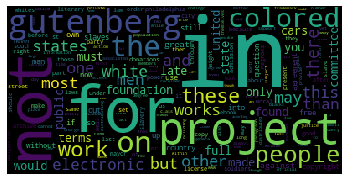

In [73]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  